In [25]:
'''
Omer Mirza
Py.03
'''
%matplotlib notebook
import string
import re
import csv
import os
import matplotlib.pyplot as plt
from datetime import datetime


This class is a stock parser. It reads data from a file and uses that to create several stock objects.
methods will be further explained below

In [26]:

class StockParser:
    
    def __init__(self):
        self.fileName = ""
        self.header = []
        self.stckList = []
        self.stockText = []
#         self.nameDict = {'3M': 'MMM', 'American Express':'AXP', 'Alcoa': 'AA','AT&T' : 'T', 'Bank of America': 'BAC','Boeing' : 'BA', 'Caterpillar' : 'CAT', 'Chevron': 'CVX', 'Cisco Systems': 'CSCO', 'Coca-Cola': 'KO', 'DuPont': 'DD', 'ExxonMobil':'XOM', 'General Electric': 'GE', 'Hewlett-Packard':'HPQ', 'The Home Depot': 'HD', 'Intel': 'INTC', 'IBM': 'IMB', "Johnson & Johnson": 'JNJ', 'JPMorgan Chase': 'JPM', 'Kraft':'KRFT','McDonald \'s': 'MCD','Merck': 'MRK', 'Microsoft': 'MSFT', 'Pfizer': 'PFE', 'Procter & Gamble': 'PG', 'Travelers': 'TRV', 'United Technologies': 'UTX', "Verizon": 'VZ', 'Wal-Mart': 'WMT', 'Walt Disney': 'DIS' }
        self.nameDict = {'MMM':'3M' , 'AXP':'American Express', 'AA':'Alcoa' ,'T':'AT&T'  , 'BAC':'Bank of America' ,'BA':'Boeing'  , 'CAT':'Caterpillar'  , 'CVX':'Chevron' , 'CSCO':'Cisco Systems' ,  'KO':'Coca-Cola', 'DD':'DuPont' , 'XOM':'ExxonMobil', 'GE':'General Electric' , 'HPQ':'Hewlett-Packard', 'HD':'The Home Depot' ,'INTC': 'Intel' , 'IBM': 'IMB','JNJ': "Johnson & Johnson" , 'JPM':'JPMorgan Chase' , 'KRFT':'Kraft','MCD':'McDonald \'s' ,'MRK':'Merck' , 'MSFT':'Microsoft' , 'PFE':'Pfizer' ,'PG': 'Procter & Gamble' , 'TRV':'Travelers' , 'UTX':'United Technologies' , 'VZ':"Verizon" , 'WMT':'Wal-Mart' , 'DIS':'Walt Disney'  }
    
    def fileReader(self, fileName): #this method reads the data from a chosen file and creates a list of stock objects

        try:
            self.fileName = fileName
            this_folder = os.path.dirname(os.path.abspath('__file__'))
            my_file_location = os.path.join(this_folder, self.fileName)
            file = open(my_file_location, newline='')
            reader = csv.reader(file)
            self.header = next(reader)
            self.stockText = [row for row in reader]
            for x in range(0, len(self.stockText)):
                self.stckList.append(Stock(self.stockText[x][1],self.stockText[x][2],self.stockText[x][3],self.stockText[x][4],self.stockText[x][5],self.stockText[x][6],self.stockText[x][7]))
        except:
            print("failure")
            
    def displayListOfSymbols(self): # This method prints each symbol with its respective meaning to the user
        print("These are the available symbols:")
        for key in self.nameDict:
            print(str(key)+" --", self.nameDict[key])
    def displayHeader(self): # This method displays the header when called
        count = 0
        for element in self.header:
            print(count, element)
            count+=1
    def makeGraph(self, symbol): # Using the stock data, two different graphs are created, one that shows the stock information and the other that details how many shares have been sold
        list = self.oneStockList(symbol)
        date =[]
        opening = []
        closing = []
        high = []
        low = []
        volume = []
        
        for x in range(0,len(list)):
            date.append(list[x].date)
            opening.append(list[x].opening)
            closing.append(list[x].closing)
            high.append(list[x].high)
            low.append(list[x].low)
            volume.append(list[x].volume)
        plt.figure(1)
        plt.plot(date,opening, label = 'Opening')
        plt.plot(date,closing,label = 'Closing')
        plt.plot(date,high, label = 'High')
        plt.plot(date,low, label = 'Low')
#         plt.plot(date, volume, label = 'volume')
        plt.xlabel('DATE')
        plt.ylabel('VALUE IN DOLLARS')
        plt.title(str(self.nameDict[symbol]))
        plt.legend()
        plt.figure(2)
        plt.plot(date, volume, label = 'volume')
        plt.xlabel('DATE')
        plt.ylabel('Shares Bought')
        plt.title(str(self.nameDict[symbol]))
        plt.legend()
        plt.show
        
    def minimumPrice(self, stockCode): # Logically using the low value of the stock of the chosen symbol it prints out the lowest stock price in the date period
        x = None
        list = self.oneStockList(stockCode)
        for y in range (0, len(list)):
            if x == None:
                x = list[y].low
            if x > list[y].low:
                x = list[y].low
        print("The lowest stock price is $" + str(x))
            
        
    def maximumPrice(self, stockCode):# Logically using the high value of the stock of the chosen symbol it prints out the highest stock price in the date period
        x = None
        list = self.oneStockList(stockCode)
        for y in range (0, len(list)):
            if x == None:
                x = list[y].high
            if x < list[y].high:
                x = list[y].high
        print("The highest stock price is $" + str(x))
            
    def oneStockList(self, stockCode): # This method seperates creates a list of exclusively one companies stocks. useful for all the other methods
        list = []
        for x in range(0, len(self.stckList)):
            if self.stckList[x].name == stockCode:
                list.append(self.stckList[x])
                
        return list
    def doAllActions(self,stockCode): # This method combines three methods for easier calling
        self.makeGraph(stockCode)
        self.maximumPrice(stockCode)
        self.minimumPrice(stockCode)
        

This object holds on to each indiviual line from the stock data file. 

In [27]:

class Stock:
    
    def __init__(self, name, date, opening, high, low, closing, volume):
        self.name = str(name)
        self.date = datetime.strptime(date,'%m/%d/%Y')
        self.opening = float(opening.replace('$',''))
        self.closing = float(closing.replace('$',''))
        self.high = float(high.replace('$',''))
        self.low = float(low.replace('$',''))
        self.volume = float(volume)

Main Method, in it I have loaded up the text document, displayed the list of symbols to the user
and prompted the user for which companies stock they would like to see

In [28]:

if __name__ == "__main__":
    stp = StockParser()
    stp.fileReader('dow_jones_index.data.txt')
    stp.displayListOfSymbols()
    
    
       
 
    

These are the available symbols:
MMM -- 3M
AXP -- American Express
AA -- Alcoa
T -- AT&T
BAC -- Bank of America
BA -- Boeing
CAT -- Caterpillar
CVX -- Chevron
CSCO -- Cisco Systems
KO -- Coca-Cola
DD -- DuPont
XOM -- ExxonMobil
GE -- General Electric
HPQ -- Hewlett-Packard
HD -- The Home Depot
INTC -- Intel
IBM -- IMB
JNJ -- Johnson & Johnson
JPM -- JPMorgan Chase
KRFT -- Kraft
MCD -- McDonald 's
MRK -- Merck
MSFT -- Microsoft
PFE -- Pfizer
PG -- Procter & Gamble
TRV -- Travelers
UTX -- United Technologies
VZ -- Verizon
WMT -- Wal-Mart
DIS -- Walt Disney


Which company's stocks do you want to see?MCD


<IPython.core.display.Javascript object>


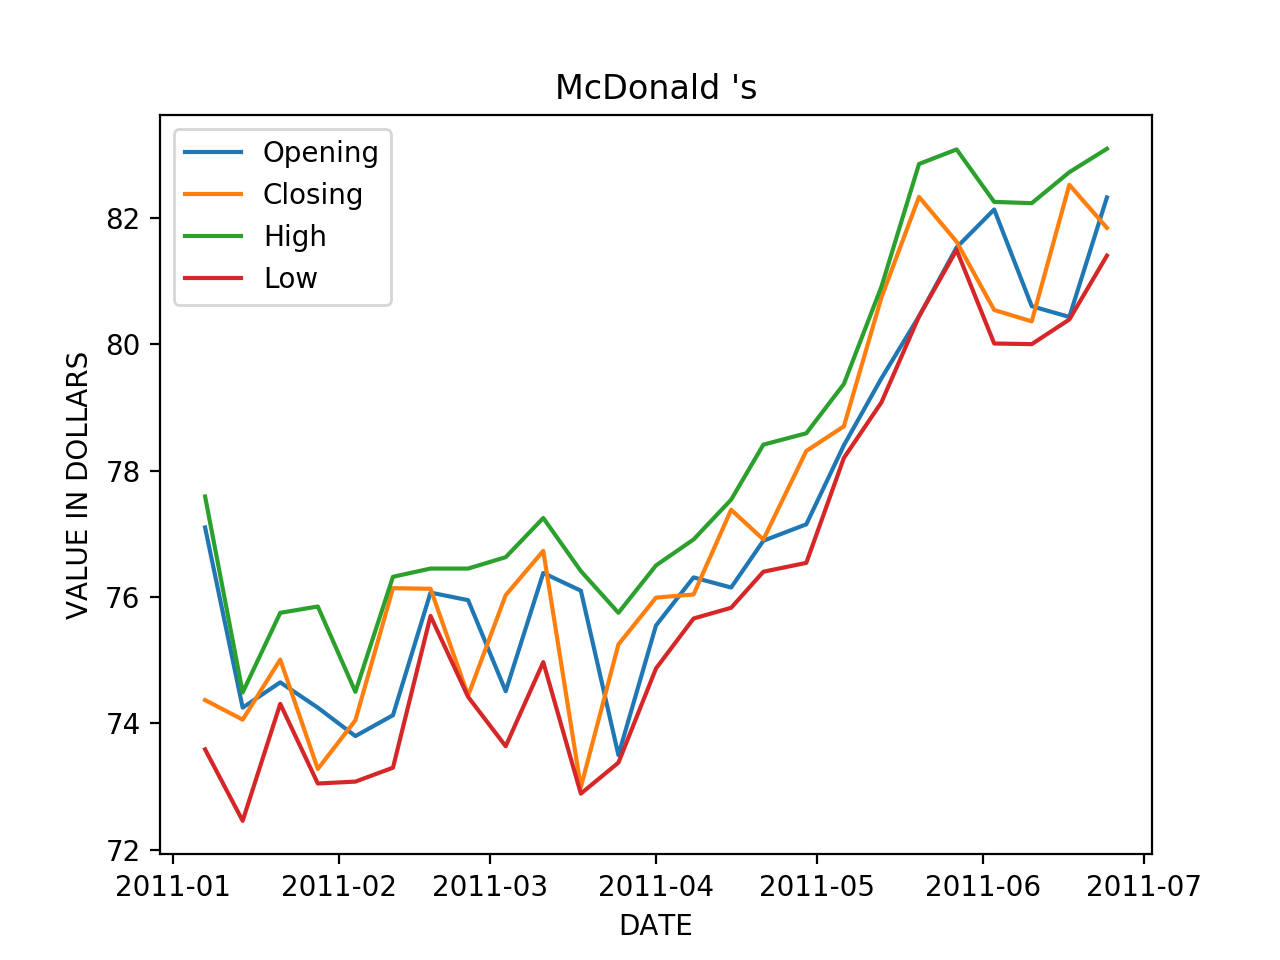

<IPython.core.display.Javascript object>


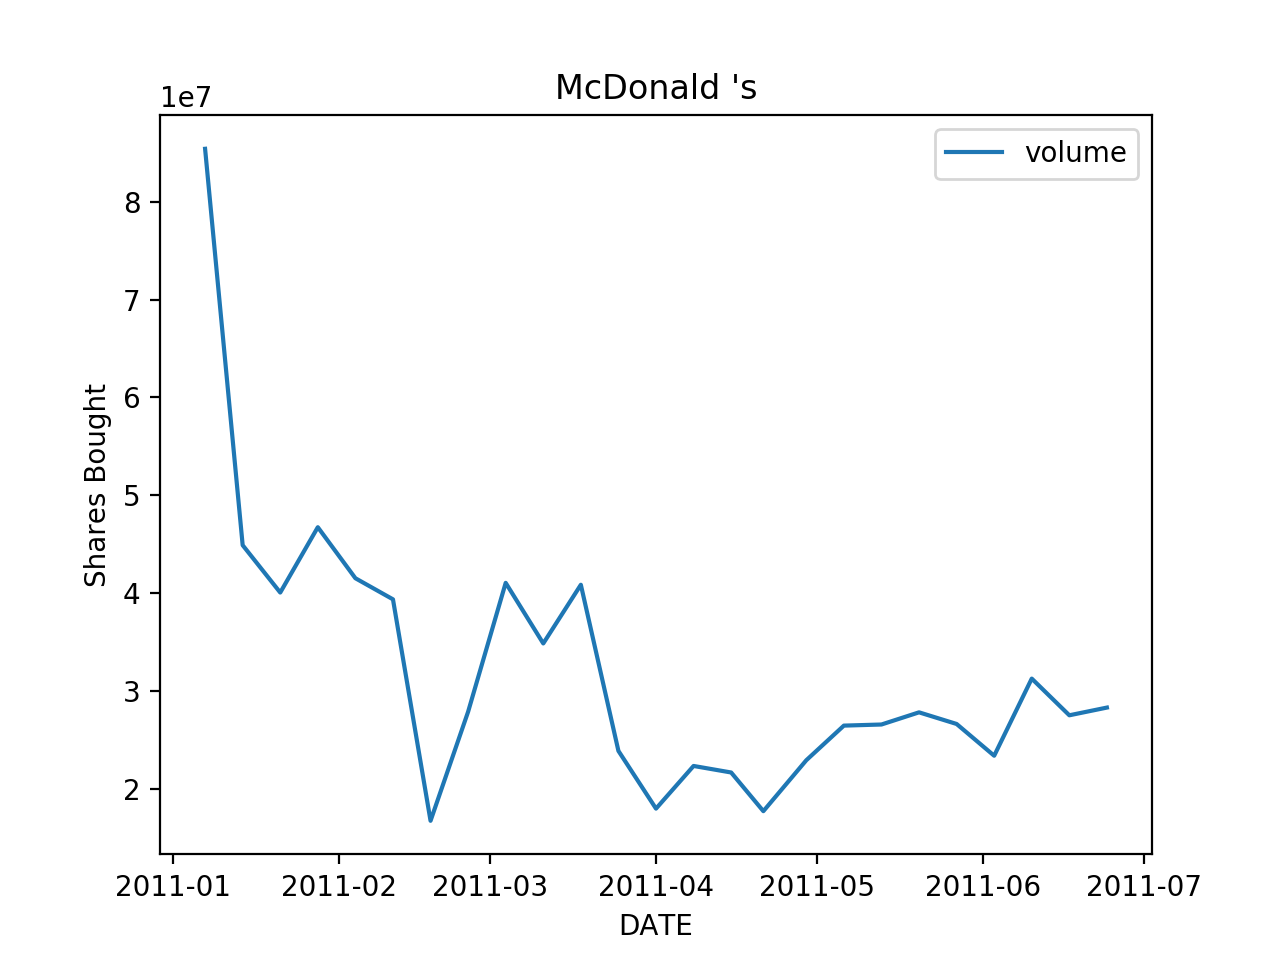

The highest stock price is $83.09
The lowest stock price is $72.46


In [29]:
stp.doAllActions(input("Which company's stocks do you want to see?"))  